In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install google-colab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d akash2907/bird-species-classification

 98% 1.35G/1.37G [00:05<00:00, 245MB/s]
100% 1.37G/1.37G [00:05<00:00, 256MB/s]


In [ ]:
! unzip bird-species-classification.zip

Archive:  bird-species-classification.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/test_data/bonegl/DSC_4588.jpg  
  inflating: test_data/

In [ ]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))  #--> (0 to 255) convert to (0 to 1)

In [ ]:
train = train_gen.flow_from_directory('/content/train_data/train_data',
                                      target_size=(224, 224),
                                      class_mode='categorical',
                                      batch_size=32)

Found 150 images belonging to 16 classes.


In [ ]:
test = test_gen.flow_from_directory('/content/test_data/test_data',
                                    target_size=(224, 224),
                                      class_mode='categorical',
                                      batch_size=32)

Found 157 images belonging to 16 classes.


In [ ]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [ ]:
img_size=(224,224)


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train.class_indices), activation='softmax'))


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_steps_per_epoch = train.n // train.batch_size
test_steps_per_epoch = test.n // test.batch_size

In [ ]:
history = model.fit(
    train,
    epochs=20,
    steps_per_epoch=train_steps_per_epoch,
    validation_data=test,
    validation_steps=test_steps_per_epoch
)


Epoch 1/20
4/4 [==============================] - 94s 25s/step - loss: 3.4420 - accuracy: 0.0763 - val_loss: 2.7555 - val_accuracy: 0.0781
Epoch 2/20
4/4 [==============================] - 110s 34s/step - loss: 2.6800 - accuracy: 0.0847 - val_loss: 2.7345 - val_accuracy: 0.0859
Epoch 3/20
4/4 [==============================] - 82s 25s/step - loss: 2.6388 - accuracy: 0.1186 - val_loss: 2.7093 - val_accuracy: 0.1719
Epoch 4/20
4/4 [==============================] - 109s 34s/step - loss: 2.5462 - accuracy: 0.2458 - val_loss: 2.6876 - val_accuracy: 0.1562
Epoch 5/20
4/4 [==============================] - 81s 25s/step - loss: 2.3541 - accuracy: 0.2734 - val_loss: 2.6515 - val_accuracy: 0.2656
Epoch 6/20
4/4 [==============================] - 111s 34s/step - loss: 2.1667 - accuracy: 0.3359 - val_loss: 2.6361 - val_accuracy: 0.2109
Epoch 7/20
4/4 [==============================] - 78s 23s/step - loss: 2.2082 - accuracy: 0.3644 - val_loss: 2.6507 - val_accuracy: 0.1406
Epoch 8/20
4/4 [========

In [ ]:
model.save('birdclassification.h5')

In [ ]:

# Testing

import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
img1 = image.load_img('/content/bird1.jfif',target_size=(224,224))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti', 'bonegl', 'behkyt', 'cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl',
          'lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 232ms/step
1
bonegl


In [ ]:
img1 = image.load_img('/content/bird2.webp',target_size=(224,224))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti', 'bonegl', 'behkyt', 'cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl',
          'lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 31ms/step
14
rebimg


In [ ]:
img1 = image.load_img('/content/bird3.jpg',target_size=(224,224))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti', 'bonegl', 'behkyt', 'cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl',
          'lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 19ms/step
7
himbul


4/4 [==============================] - 39s 10s/step - loss: 3.3112 - accuracy: 0.2656
Testing Loss: 3.3112
Testing Accuracy: 0.2656


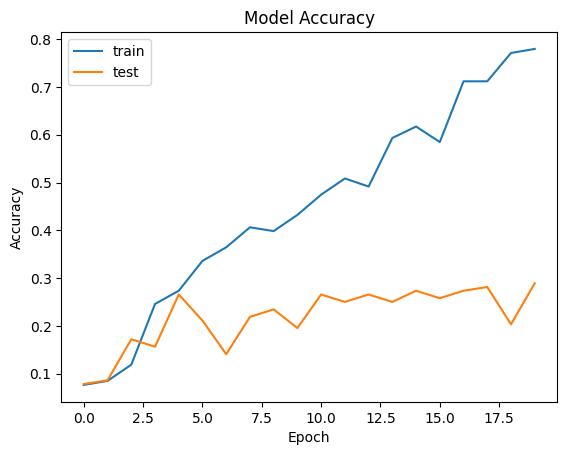

In [ ]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(test, steps=test_steps_per_epoch)
print(f"Testing Loss: {loss:.4f}")
print(f"Testing Accuracy: {accuracy:.4f}")

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0